In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Точечная диаграмма

In [5]:
df_mean = df.groupby('parental level of education').mean()[['math score', 'reading score', 'writing score']]
df_mean

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


Линейчатый график

<AxesSubplot:title={'center':'Связь средней оценки по предмету c уровнем образования'}, xlabel='Уровень образования', ylabel='Средняя оценка'>

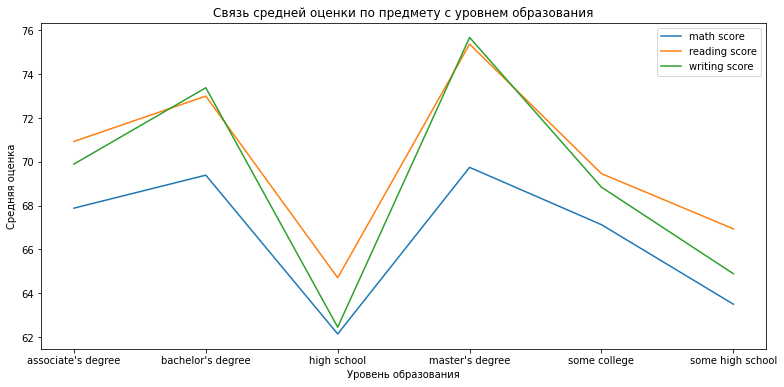

In [6]:
df_mean.plot(title='Связь средней оценки по предмету c уровнем образования', 
             xlabel='Уровень образования', 
             ylabel='Средняя оценка')


In [ ]:
По всем предметам наиболее высокие средние оценки получают студенты с уровнем образования master's degree, а также bachelor's degree, 
при этом окончившие high school имеют, наоборот, наиболее низкий средний балл по всем предметам.
По математике получены средние баллы ниже, чем по чтению и письменности в целом.

Boxplot

<AxesSubplot:title={'center':'Score'}>

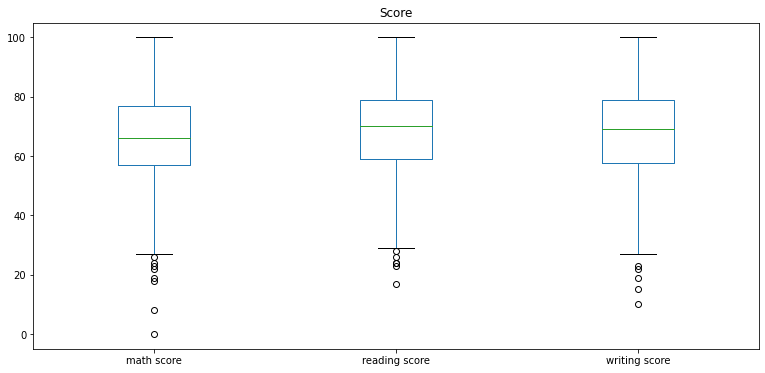

In [7]:
df[['math score', 'reading score', 'writing score']].plot(kind='box',
                                                     title='Score')

In [ ]:
Медианное значение по математике несколько ниже, чем по чтению и письму.
Выбросов больше, чем максимамальное значение (100), нет по всем предметам, при этом есть выбросы ниже минимума и по математике разброс
больше, чем по чтению и письму.

In [8]:
import seaborn as sns

Взаимосвязь между оценками по математике и группами:

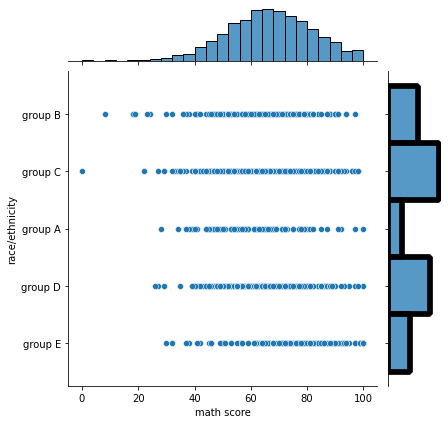

In [10]:
sns.jointplot(x='math score', y='race/ethnicity', 
              data=df, kind='scatter')

In [ ]:
По математике оценки примерно на уровне 60-70 баллов, при этом больше всего оценок по группе С 
(т.к. в группе больше студентов, чем в остальных группах), меньше всего оценок в группах А и Е.

In [11]:
def groups(x):
        return x['math score'].max()-x['math score'].min()

In [12]:
gg = df.groupby('race/ethnicity').apply(groups)
gg

race/ethnicity
group A    72
group B    89
group C    98
group D    74
group E    70
dtype: int64

<AxesSubplot:title={'center':'Размах оценок по математике'}, xlabel='Группы', ylabel='Баллы'>

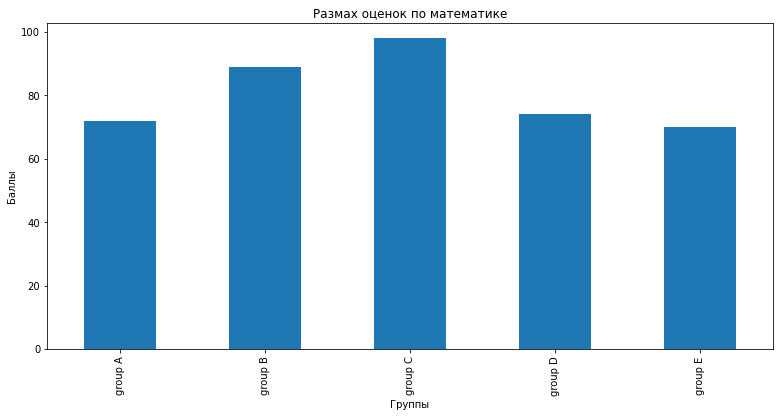

In [13]:
gg.plot(kind='bar', 
        title='Размах оценок по математике',
        xlabel='Группы',
        ylabel='Баллы')

In [ ]:
Максимальный размах по баллам в группе С (практически на уровне 100 баллов), т.к. группа больше по численности, 
чем все остальные, в данной группе есть выброс в виде самого низкого балла по предмету (выборка больше). При этом студенты 
групп А, D и Е имеют примерно одинаковый размах оценок, хотя группа D вторая по численности, что говорит о том, что большее 
число студентов в группе D учатся на одинаковом уровне.

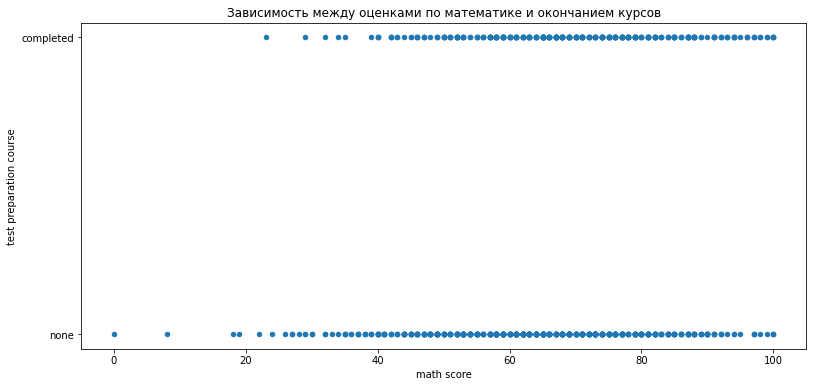

In [14]:
df.plot(kind='scatter', 
        x='math score', 
        y='test preparation course', 
        title='Зависимость между оценками по математике и окончанием курсов')
plt.show()

In [ ]:
Те, кто окончил курсы по предметам, имеют более высокий балл по математике и меньше вероятность сдать на самый низкий балл.